In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import tkinter as tk
from tkinter import filedialog

In [2]:
# -----------------------------
# 1. Use tkinter to pop up file selection dialog
# -----------------------------
root = tk.Tk()
root.withdraw()  # 隐藏主窗口

file_path = filedialog.askopenfilename(
    title="Select CSV file",
    filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
)
if not file_path:
    raise Exception("No file selected!")

In [3]:
# -----------------------------
# 2. Read data from CSV file
#    Assume:
#       - each row is a sample,
#       - the first n columns are independent variables (features),
#       - the last column is the dependent variable.
# -----------------------------
data = pd.read_csv(file_path)

# Specify the number of independent variables (n)
n_features = 1  # 你可以修改这个值

# Extract features (X) and target (y)
X = data.iloc[:, :n_features].values
y = data.iloc[:, -1].values

In [7]:
# -----------------------------
# 3. Decision Tree Regression and simulate iterative process
#    这里采用改变 max_depth（1 到 10）来模拟训练过程中 cost (MSE) 的变化
# -----------------------------
max_depth_range = range(1, 11)  # 将 max_depth 从 1 到 10 变化
train_mse = []

for depth in max_depth_range:
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=0)
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    mse = mean_squared_error(y, y_pred)
    train_mse.append(mse)

# 选择训练误差最低的模型作为最佳模型
best_index = np.argmin(train_mse)
best_depth = list(max_depth_range)[best_index]
best_model = DecisionTreeRegressor(max_depth=best_depth, random_state=0)
best_model.fit(X, y)
y_pred_best = best_model.predict(X)

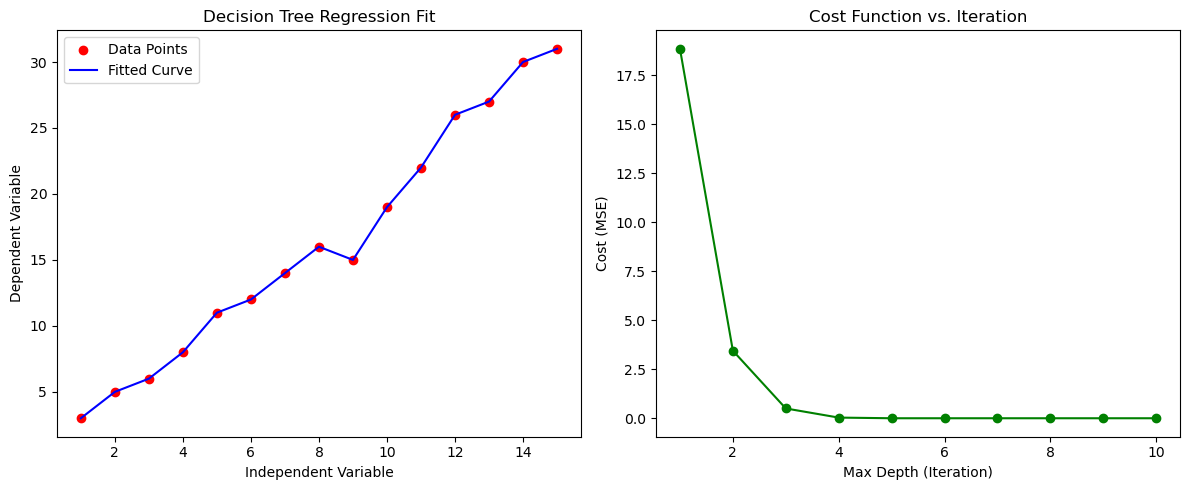

In [9]:
# -----------------------------
# 4. Visualization
#    如果自变量是1维，则绘制数据散点图和拟合曲线；
#    同时绘制 cost function (MSE) 随 max_depth（迭代）的变化曲线。
# -----------------------------
if n_features == 1:
    # 为了绘制拟合曲线，将 X 按升序排序
    sort_idx = X[:, 0].argsort()
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]
    y_pred_sorted = best_model.predict(X_sorted)

    plt.figure(figsize=(12, 5))

    # 左侧子图：数据散点与拟合曲线
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color='red', label='Data Points')
    plt.plot(X_sorted, y_pred_sorted, color='blue', label='Fitted Curve')
    plt.xlabel("Independent Variable")
    plt.ylabel("Dependent Variable")
    plt.title("Decision Tree Regression Fit")
    plt.legend()

    # 右侧子图：Cost function vs. Iteration (here: max_depth)
    plt.subplot(1, 2, 2)
    plt.plot(list(max_depth_range), train_mse, marker='o', color='green')
    plt.xlabel("Max Depth (Iteration)")
    plt.ylabel("Cost (MSE)")
    plt.title("Cost Function vs. Iteration")

    plt.tight_layout()
    plt.show()
else:
    print("Visualization of fitted curve is only supported for one independent variable.")
